# Minimal code for Extended Data Figure 1a flow cytometry panel

In [1]:
# library for reading .fcs files
suppressPackageStartupMessages(library(flowCore))
# library for extracting statistical fits
suppressPackageStartupMessages(library(broom))
# standard analysis and plotting functions, includes dplyr, ggplot2
suppressPackageStartupMessages(library(tidyverse))
# loads lab default ggplot2 theme and provides color-blind friendly palette
suppressPackageStartupMessages(library(rasilabRtemplates))
# this folder contains the data and annotations
fcs_file_folder <- c("../../../../data/flow_cytometry/figs1a_eyfp_reporter_sgeyfp_u2os_293t/day1/", 
                     "../../../../data/flow_cytometry/figs1a_eyfp_reporter_sgeyfp_u2os_293t/day3/", 
                     "../../../../data/flow_cytometry/figs1a_eyfp_reporter_sgeyfp_u2os_293t/day5/",
                     "../../../../data/flow_cytometry/figs1a_eyfp_reporter_sgeyfp_u2os_293t/day8/",
                     "../../../../data/flow_cytometry/figs1a_eyfp_reporter_sgeyfp_u2os_293t/day11/")
# nice channel names
channels <- c(
  "fitc_a" = "yfp", "pe_texas_rd_a" = "rfp",
  "bv421_a" = "bfp"
)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [2]:
if (!file.exists('../figures')){
    dir.create('../figures')
}

## Read in annotations

In [3]:
annotations <- read_csv("../annotations/sample_annotations.csv") %>% 
  mutate(file = as.character(file)) %>%
  print()

Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sgRNA, cell_line
dbl (1): file

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 9 × 3
  file  sgRNA  cell_line
  <chr> <chr>  <chr>    
1 1     FLUC   293T     
2 2     FLUC   HCT116   
3 4     YFP    293T     
4 5     YFP    HCT116   
5 9     FLUC   U2OS     
6 12    YFP    U2OS     
7 64    parent 293T     
8 132   parent HCT116   
9 280   parent U2OS     


## Read in flow data

In [4]:
options(warn=-1)

flowdata  <- list.files(fcs_file_folder, full.names = T, recursive = T, pattern = ".fcs") %>% 
  as_tibble_col("file") %>%
  mutate(day = as.integer(str_extract(file, "(?<=day)\\d+"))) %>% 
  mutate(data = map(file, . %>% read.FCS(transformation = F, alter.names = T) %>% exprs %>% as_tibble)) %>%
  mutate(file = str_extract(file, "(?<=events_)[:graph:]+(?=.fcs$)")) %>%
  unnest("data") %>%
  janitor::clean_names() %>%
  rename_with(. %>% channels[.], names(channels)) %>%
  select(day, file, ssc_a, bfp, yfp, rfp) %>%
  print()

# A tibble: 300,000 × 6
     day file  ssc_a   bfp      yfp   rfp
   <int> <chr> <dbl> <dbl>    <dbl> <dbl>
 1     1 1      40.3  86.8   422.   1724.
 2     1 1      88.4  29.6  1538.   3734.
 3     1 1      15.7  42.0  4493.   3609.
 4     1 1     107.  110.      7.83 1247.
 5     1 1     181.  132.   3569.   5775.
 6     1 1      52.7  42.3   237.   4211.
 7     1 1      24.1  75.3  1537.   6147.
 8     1 1      25.3  35.0  3218.   4557.
 9     1 1     142.  236.  29723.    367.
10     1 1      87.0  44.4  8258.    298.
# … with 299,990 more rows


## Join data with annotations

In [5]:
data <- flowdata %>% 
     inner_join(annotations, by = "file") %>% 
     print() 

# A tibble: 300,000 × 8
     day file  ssc_a   bfp      yfp   rfp sgRNA cell_line
   <int> <chr> <dbl> <dbl>    <dbl> <dbl> <chr> <chr>    
 1     1 1      40.3  86.8   422.   1724. FLUC  293T     
 2     1 1      88.4  29.6  1538.   3734. FLUC  293T     
 3     1 1      15.7  42.0  4493.   3609. FLUC  293T     
 4     1 1     107.  110.      7.83 1247. FLUC  293T     
 5     1 1     181.  132.   3569.   5775. FLUC  293T     
 6     1 1      52.7  42.3   237.   4211. FLUC  293T     
 7     1 1      24.1  75.3  1537.   6147. FLUC  293T     
 8     1 1      25.3  35.0  3218.   4557. FLUC  293T     
 9     1 1     142.  236.  29723.    367. FLUC  293T     
10     1 1      87.0  44.4  8258.    298. FLUC  293T     
# … with 299,990 more rows


## Plot YFP expression over time

# A tibble: 254,370 × 6
     day file  sgRNA  cell_line channel    value
   <int> <chr> <chr>  <chr>     <chr>      <dbl>
 1     1 1     sgCTRL 293T      EYFP      422.  
 2     1 1     sgCTRL 293T      EYFP     1538.  
 3     1 1     sgCTRL 293T      EYFP     4493.  
 4     1 1     sgCTRL 293T      EYFP        7.83
 5     1 1     sgCTRL 293T      EYFP     3569.  
 6     1 1     sgCTRL 293T      EYFP      237.  
 7     1 1     sgCTRL 293T      EYFP     1537.  
 8     1 1     sgCTRL 293T      EYFP     3218.  
 9     1 1     sgCTRL 293T      EYFP    29723.  
10     1 1     sgCTRL 293T      EYFP     8258.  
# … with 254,360 more rows


Picking joint bandwidth of 0.0724

Picking joint bandwidth of 0.0694

Picking joint bandwidth of 0.0724

Picking joint bandwidth of 0.0694



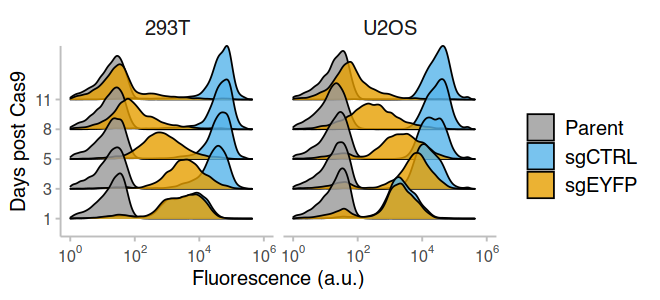

In [7]:
options(repr.plot.width = 5.5, repr.plot.height = 2.5)

plot_data <- data %>%
  # collapse all channels
  pivot_longer(c("bfp", "yfp", "rfp", "ssc_a"), names_to = "channel") %>% 
  filter(channel %in% c("yfp")) %>% 
  mutate(sgRNA = case_when(
    sgRNA == "parent" ~ "Parent",
    sgRNA == "FLUC" ~ "sgCTRL",
    sgRNA == "YFP" ~ "sgEYFP",
  )) %>%
  # filter(sgrna == "sgEYFP") %>% 
  mutate(channel = case_when(
    channel == "yfp" ~ "EYFP",
  )) %>%
  filter(value >= 1) %>%
  write_csv("../../../../source_data/figure_s1a.csv") %>%
  print()

plot_data %>%
  ggplot(aes(x = value, y = as.factor(day), fill = sgRNA)) +
  ggridges::geom_density_ridges(alpha = 0.8) +
  facet_wrap(~cell_line) +
  scale_x_log10(limits = c(1, 1e6), breaks = scales::trans_breaks("log10", function(x) 100^x),
  labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  # annotation_logticks(sides = "b") +
  scale_fill_manual(values = cbPalette[c(1,3,2)]) +
  labs(x = "Fluorescence (a.u.)", y = "Days post Cas9", fill = "") +
  theme(axis.line = element_line(color = "grey"),
  axis.ticks = element_line(color = "grey")) +
  NULL
  
ggsave("../figures/sgyfp_sgfluc_effects_for_validation.pdf", width = 5.5, height = 2.5)